In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [56]:
one = pd.read_csv('one_stats_rss.csv')
ten = pd.read_csv('ten_stats_rss.csv')
o2c7 = pd.read_csv('one_2c7_stats_rss.csv')
o2c4 = pd.read_csv('one_2c4_stats.csv')
m2c5_6 = pd.read_csv('mul_2c5-6stats_rss.csv')
m2_5 = pd.read_csv('mul_2-5_stats_rss.csv')

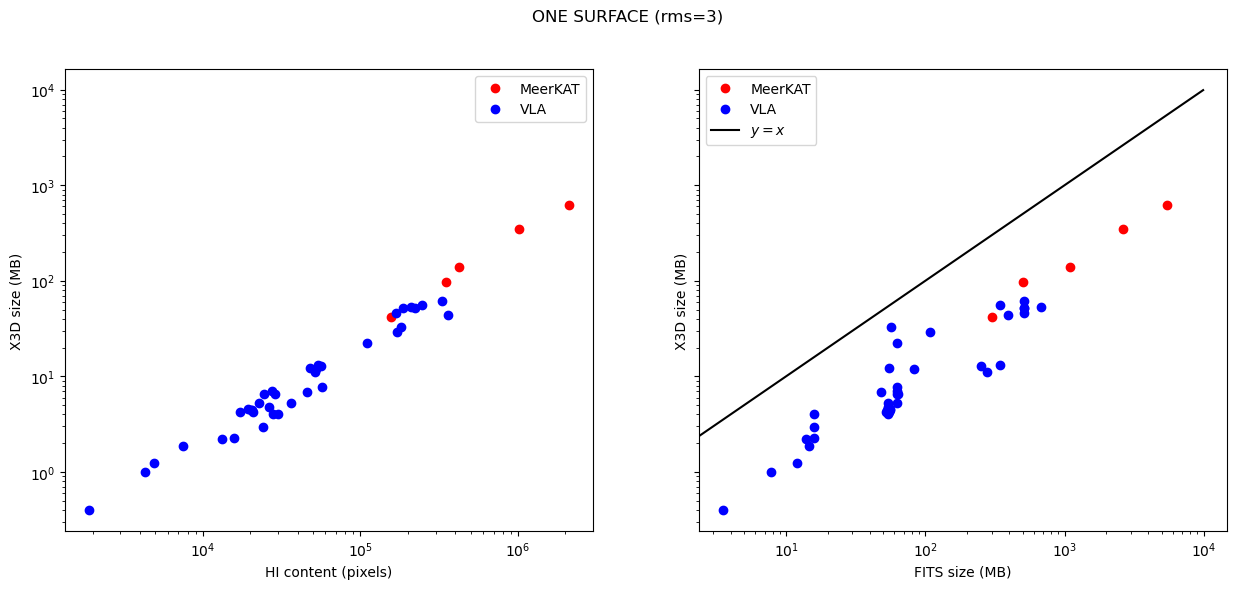

In [8]:
start = 5
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
fig.suptitle('ONE SURFACE (rms=3)')
plt.axes(ax[0])
plt.plot(one['HIcont'][:start], one['High/No'][:start], 'ro', label='MeerKAT')
plt.plot(one['HIcont'][start:], one['High/No'][start:], 'bo', label='VLA')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.yscale('log')
plt.xscale('log')
plt.legend();
plt.axes(ax[1])
plt.plot(one['FITS'][:start], one['High/No'][:start], 'ro', label='MeerKAT')
plt.plot(one['FITS'][start:], one['High/No'][start:], 'bo', label='VLA')
plt.plot(np.arange(0,1e4,1e2),np.arange(0,1e4,1e2), 'k', label=r'$y=x$')
plt.xlabel('FITS size (MB)')
plt.ylabel('X3D size (MB)')
plt.xscale('log')
plt.legend();

In [62]:
from scipy.optimize import curve_fit
def func(x, a, b,): #
    return a + x * b #+ c * x**2

m_o = ~np.isnan(one['T_RAM'])
m_t = ~np.isnan(ten['T_RAM'])


In [63]:
x = np.hstack([one['High/No'],ten['High/No'],o2c7['High/No'],o2c4['High/No'],m2c5_6['High/No'],m2_5['High/No']])
y =  np.hstack([one['T_RAM'],ten['T_RAM'],o2c7['T_RAM'],o2c4['T_RAM'],m2c5_6['T_RAM'],m2_5['T_RAM']])
               
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

popt, pcov = curve_fit(func, x[x>0], y[x>0])
print(popt)

[474.85669292   8.88657238]


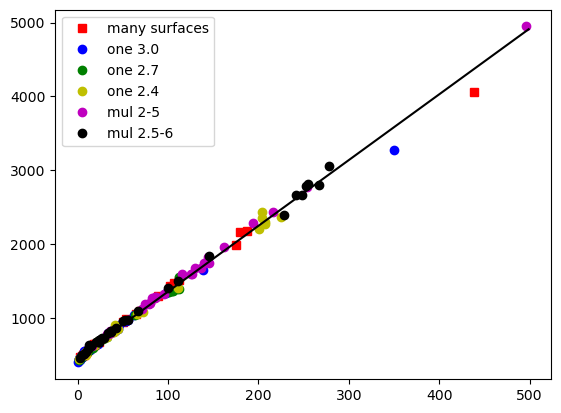

In [65]:
plt.plot(ten['High/No'], ten['T_RAM'], 'rs', label='many surfaces')
plt.plot(one['High/No'], one['T_RAM'], 'bo', label='one 3.0')
plt.plot(o2c7['High/No'], o2c7['T_RAM'], 'go', label='one 2.7')
plt.plot(o2c4['High/No'], o2c4['T_RAM'], 'yo', label='one 2.4')
plt.plot(m2_5['High/No'], m2_5['T_RAM'], 'mo', label='mul 2-5')
plt.plot(m2c5_6['High/No'], m2c5_6['T_RAM'], 'ko', label='mul 2.5-6')
plt.plot(np.arange(0,500),func(np.arange(0,500),*popt), 'k') #, popt[2], popt[3]
# for siz in ten[5][~np.isnan(ten[11])]:
#     plt.axvline(x=siz, color='y', linestyle='--')
# for siz in one[5][~np.isnan(one[8])]:
#     plt.axvline(x=siz, color='g', linestyle='--')
# plt.axhline(y=2048,color='y', linestyle='--', label='2GB')
# plt.xlabel('X3D size (MB)')
# plt.ylabel('RSS memory (MB)');
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(500,700)
# plt.xlim(20,40)
plt.legend();


In [39]:
from scipy.stats import shapiro

shap = shapiro(func(x, *popt)-y)

shap

ShapiroResult(statistic=0.8639971613883972, pvalue=1.1013966059181257e-06)

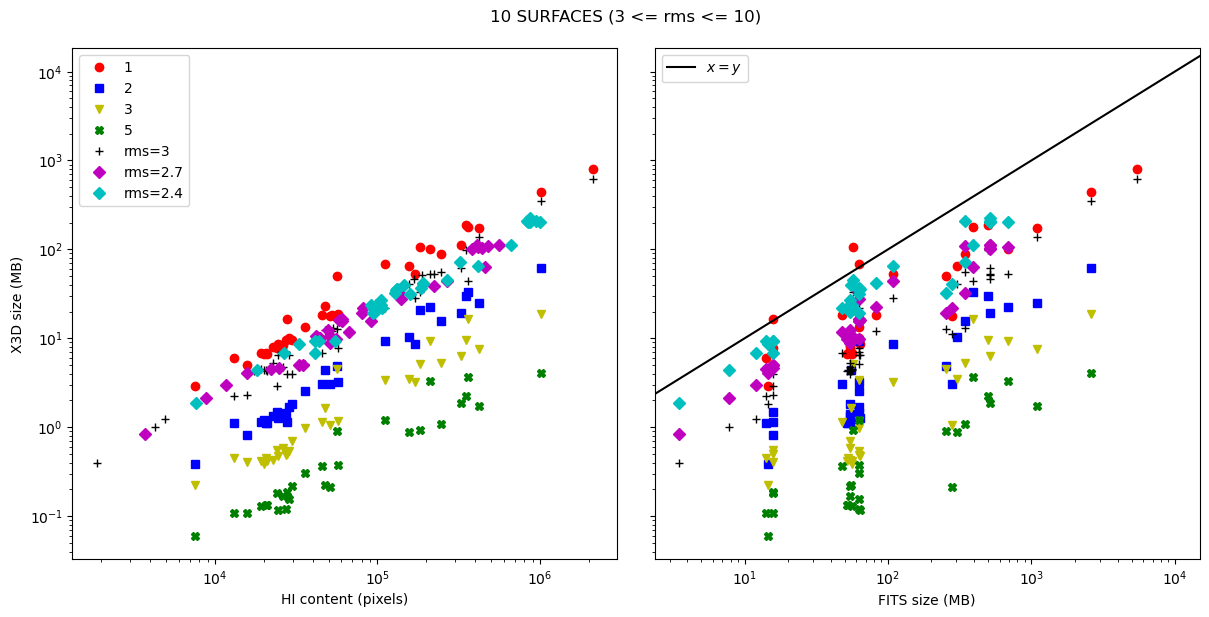

In [50]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
fig.suptitle('10 SURFACES (3 <= rms <= 10)')
fig.tight_layout()
plt.axes(ax[0])
plt.plot(ten['HIcont'][start:], ten['High/No'][start:], 'or', label='1')
plt.plot(ten['HIcont'][start:], ten['Tri2'][start:], 'sb', label='2')
plt.plot(ten['HIcont'][start:], ten['Tri3'][start:], 'vy', label='3')
plt.plot(ten['HIcont'][start:], ten['Tri5'][start:], 'Xg', label='5')
plt.plot(one['HIcont'][start:], one['High/No'][start:], '+k', label='rms=3')
plt.plot(o2c7['HIcont'][start:], o2c7['High/No'][start:], 'Dm', label='rms=2.7')
plt.plot(o2c4['HIcont'][start:], o2c4['High/No'][start:], 'Dc', label='rms=2.4')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten['FITS'][start:], ten['High/No'][start:], 'or')
plt.plot(ten['FITS'][start:], ten['Tri2'][start:], 'sb')
plt.plot(ten['FITS'][start:], ten['Tri3'][start:], 'vy')
plt.plot(ten['FITS'][start:], ten['Tri5'][start:], 'Xg')
plt.plot(one['FITS'][start:], one['High/No'][start:], '+k')
plt.plot(o2c7['FITS'][start:], o2c7['High/No'][start:], 'Dm')
plt.plot(o2c4['FITS'][start:], o2c4['High/No'][start:], 'Dc')
ax[1].axline((7,7), (1e4,1e4), color='k', label=r'$x=y$')
plt.legend()
plt.xlabel('FITS size (MB)');
plt.xscale('log')
# plt.ylim(-10,200)
# plt.xlim(-100,550)

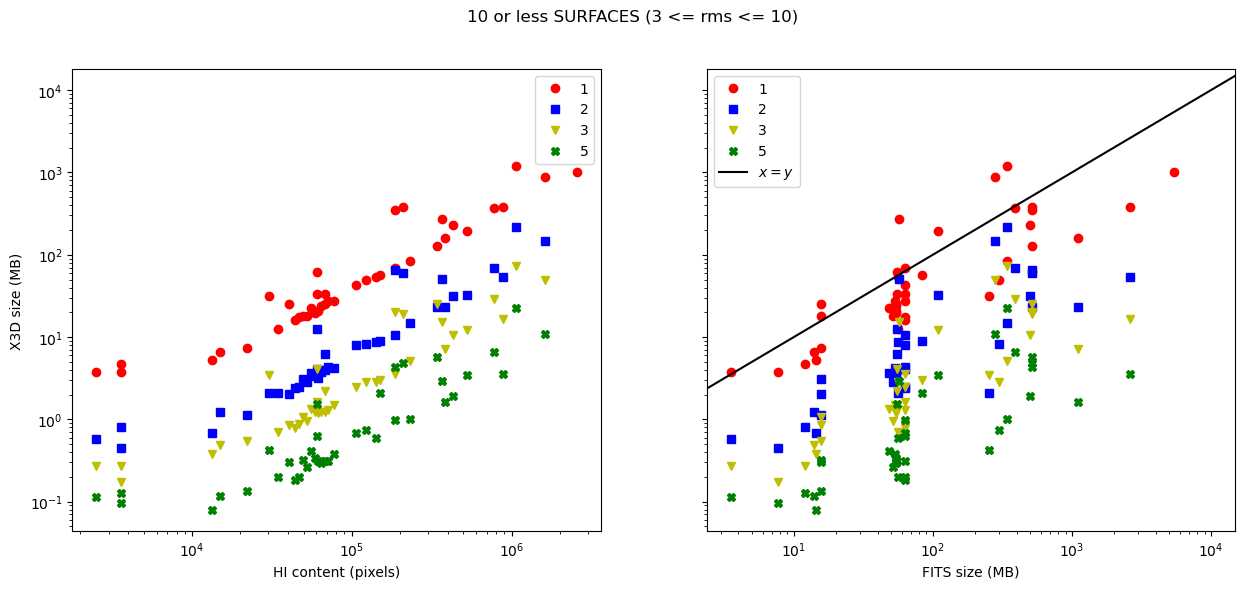

In [56]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
fig.suptitle('10 or less SURFACES (3 <= rms <= 10) ')
plt.axes(ax[0])
plt.plot(ten[1][start:], ten[5][start:], 'or', label='1')
plt.plot(ten[1][start:], ten[6][start:], 'sb', label='2')
plt.plot(ten[1][start:], ten[7][start:], 'vy', label='3')
plt.plot(ten[1][start:], ten[8][start:], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten[0][start:], ten[5][start:], 'or', label='1')
plt.plot(ten[0][start:], ten[6][start:], 'sb', label='2')
plt.plot(ten[0][start:], ten[7][start:], 'vy', label='3')
plt.plot(ten[0][start:], ten[8][start:], 'Xg', label='5')
ax[1].axline((7,7), (1e4,1e4), color='k', label=r'$x=y$')
plt.legend()
plt.xlabel('FITS size (MB)');
plt.xscale('log')

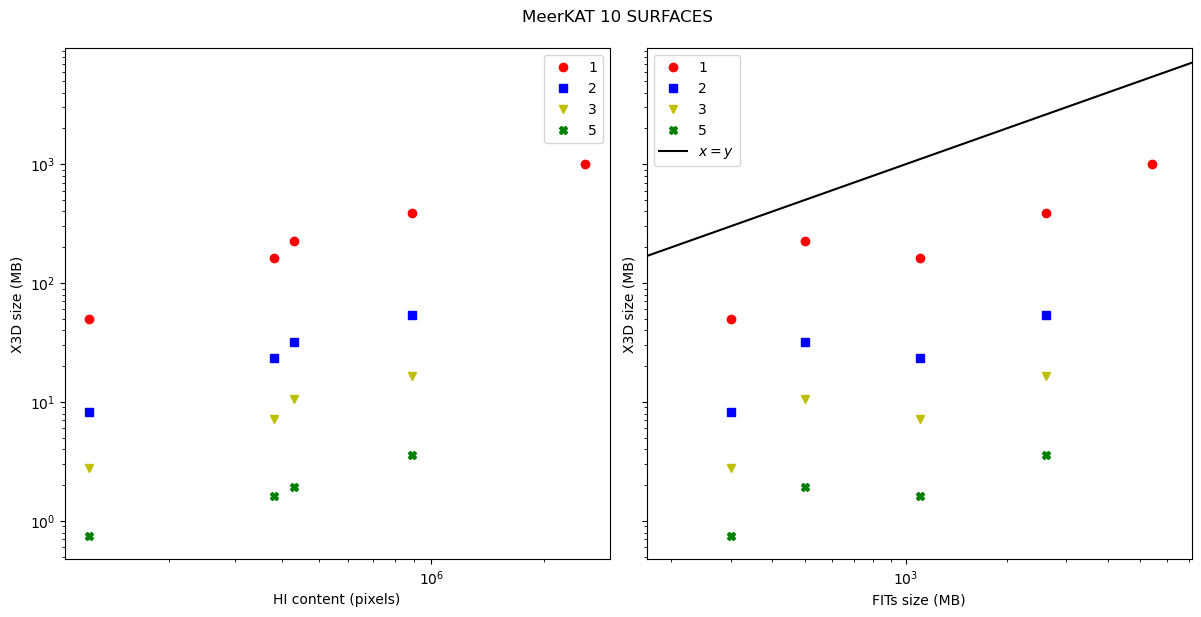

In [64]:
start = 5
fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
fig.suptitle('MeerKAT 10 SURFACES')
fig.tight_layout()
plt.axes(ax[0])
plt.plot(ten[1][:start], ten[5][:start], 'or', label='1')
plt.plot(ten[1][:start], ten[6][:start], 'sb', label='2')
plt.plot(ten[1][:start], ten[7][:start], 'vy', label='3')
plt.plot(ten[1][:start], ten[8][:start], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten[0][:start], ten[5][:start], 'or', label='1')
plt.plot(ten[0][:start], ten[6][:start], 'sb', label='2')
plt.plot(ten[0][:start], ten[7][:start], 'vy', label='3')
plt.plot(ten[0][:start], ten[8][:start], 'Xg', label='5')
ax[1].axline((200,200), (6e3,6e3), color='k', label=r'$x=y$')
plt.xscale('log')
plt.xlabel('FITs size (MB)')
plt.ylabel('X3D size (MB)')
plt.legend();